# Zoom in on 5% library-independent reduced templates performances

## Import datasets

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from statannot import add_stat_annotation

warnings.filterwarnings('ignore')

df1 = pd.read_csv('../results/library-independent_RTs/gene_essentiality_estimation/5%_RTs_BAGEL_rnd.tsv', sep='\t')
df2 = pd.read_csv('../results/library-independent_RTs/gene_essentiality_estimation/5%_RTs_FDR_rnd.tsv', sep='\t')
df3 = pd.read_csv('../results/library-independent_RTs/gene_essentiality_estimation/Common_vs_exclusive.tsv', sep='\t')

## Plots

Validation of the MinTEs 5% library-independent reduced template (RT) on independent datasets (BAGEL):

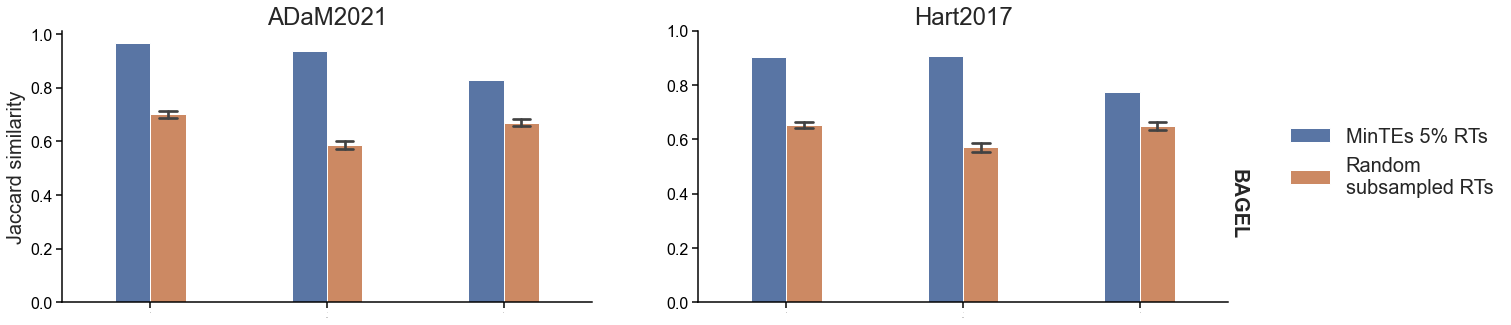

In [13]:
sns.set_style("whitegrid", {'font.family':'sans-serif', 'font.sans-serif':'Arial', 'axes.grid':False, 
        'axes.edgecolor':'black'})
g = sns.FacetGrid(data = df1, col = 'gset', gridspec_kws={"wspace":0.2, "hspace":0.4},
    height = 5, aspect = 2, margin_titles=True, sharey=False, sharex=False)
g = g.map(sns.barplot, 'source', 'value', 'type', palette = 'deep', hue_order = ['MinTEs 5% RTs', 'Random\nsubsampled RTs'], capsize=0.1)
g.add_legend(fontsize=20)
g.axes[0,0].set_ylabel('Jaccard similarity', size=20)
g.axes[0,0].set_xlabel('Library', size=0)
g.axes[0,1].set_xlabel('Library', size=0)
g.axes[0,1].text(2.5, 0.25, 'BAGEL', weight = 'bold', fontsize=20, rotation=270)
g.set_titles(col_template="{col_name}", row_template="{row_name}")

for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize=24)
    ax.tick_params(axis='both', colors='black', reset=True, direction='out', top=False, right=False, length=6, width=1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

    c=0

    for bar, newwidth in zip(ax.patches, np.array([0.2]*6)):
        x = bar.get_x()

        if c < 3:
            centre = x+newwidth/2
            bar.set_x(centre+newwidth/2)
        else:
            centre = x-newwidth/2
            bar.set_x(centre+newwidth/2)

        c+=1
        bar.set_width(newwidth)

    for err in ax.lines:
        xpos = err.get_xdata()
        xpos = xpos-newwidth/2
        err.set_xdata(xpos)

for j in range(2):
    y_axis = g.axes[0,j].get_yticks()
    y_dist = np.arange(0, 1.1, 0.2)
    y_axis = np.round(y_dist, decimals=2)

    g.axes[0,j].set_yticks(y_axis)
    g.axes[0,j].set_yticklabels(y_axis, size = 16)

    x_axis = g.axes[0,j].get_xticks()
    g.axes[0,j].set_xticklabels(x_axis, size = 0)

Validation of the MinTEs 5% library-independent RT on independent datasets (FDR method):

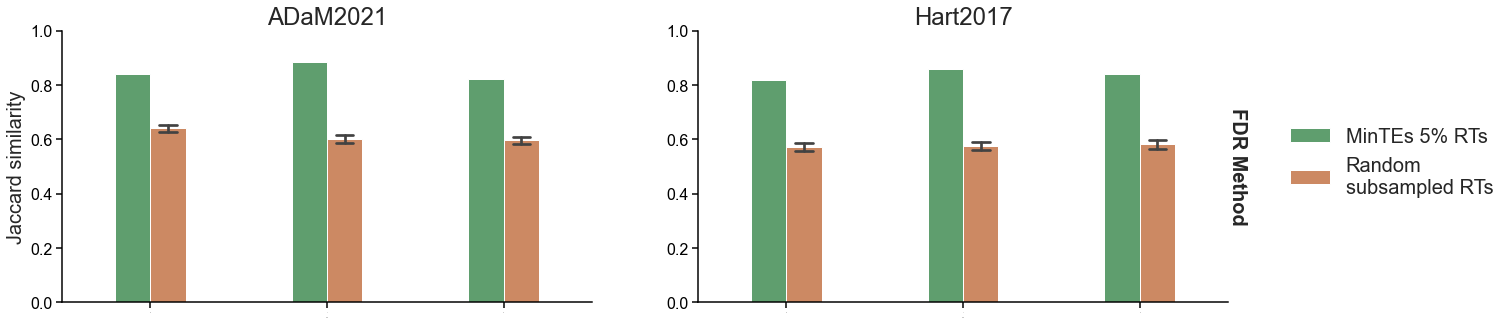

In [14]:
sns.set_style("whitegrid", {'font.family':'sans-serif', 'font.sans-serif':'Arial', 'axes.grid':False, 
        'axes.edgecolor':'black'})
g = sns.FacetGrid(data = df2, col = 'gset', gridspec_kws={"wspace":0.2, "hspace":0.4},
    height = 5, aspect = 2, margin_titles=True, sharey=False, sharex=False)
g = g.map(sns.barplot, 'source', 'value', 'type', palette = [sns.color_palette('deep')[2], sns.color_palette('deep')[1]], hue_order = ['MinTEs 5% RTs', 'Random\nsubsampled RTs'], capsize=0.1)
g.add_legend(fontsize=20)
g.axes[0,0].set_ylabel('Jaccard similarity', size=20)
g.axes[0,0].set_xlabel('Library', size=0)
g.axes[0,1].set_xlabel('Library', size=0)
g.axes[0,1].text(2.5, 0.3, 'FDR Method', weight = 'bold', fontsize=20, rotation=270)
g.set_titles(col_template="{col_name}", row_template="{row_name}")

for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize=24)
    ax.tick_params(axis='both', colors='black', reset=True, direction='out', top=False, right=False, length=6, width=1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

    c=0

    for bar, newwidth in zip(ax.patches, np.array([0.2]*6)):
        x = bar.get_x()

        if c < 3:
            centre = x+newwidth/2
            bar.set_x(centre+newwidth/2)
        else:
            centre = x-newwidth/2
            bar.set_x(centre+newwidth/2)

        c+=1
        bar.set_width(newwidth)

    for err in ax.lines:
        xpos = err.get_xdata()
        xpos = xpos-newwidth/2
        err.set_xdata(xpos)

for j in range(2):
    y_axis = g.axes[0,j].get_yticks()
    y_dist = np.arange(0, 1.1, 0.2)
    y_axis = np.round(y_dist, decimals=2)

    g.axes[0,j].set_yticks(y_axis)
    g.axes[0,j].set_yticklabels(y_axis, size = 16)

    x_axis = g.axes[0,j].get_xticks()
    g.axes[0,j].set_xticklabels(x_axis, size = 0)

Gene depletion fold-changes (post-correction for copy-number-bias) for genes that are commonly predicted as fitness by BAGEL when using as template classifier the MinTEs 5% library-independent RTs or the original reference gene-set of derivation, and for genes that are exclusive to one of the two predicted sets:

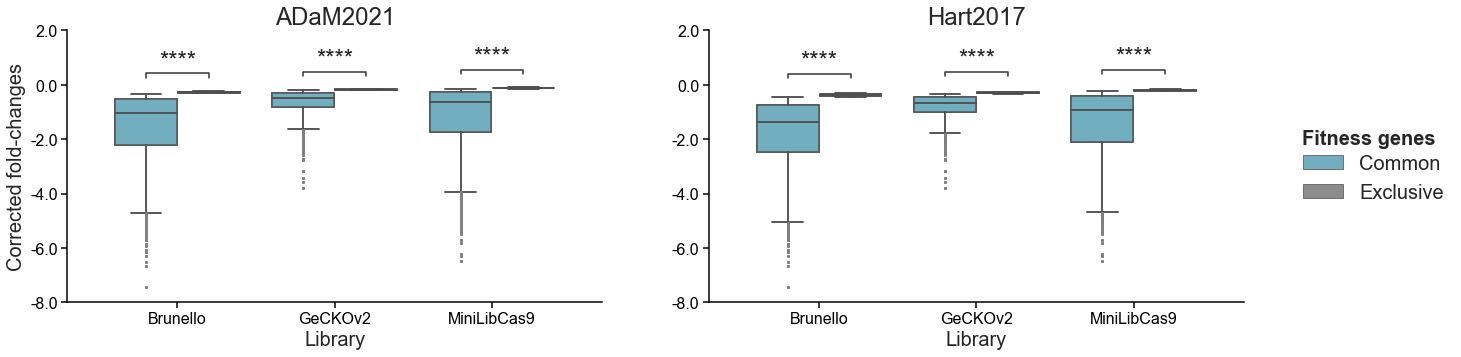

In [16]:
def custom_boxplot(*args, **kwargs):
    ax = sns.boxplot(*args, **kwargs)

    add_stat_annotation(ax, data=df3, x="Library", y="Corrected fold-changes", hue="category",
                box_pairs=[(("GeCKOv2", "Common"), ("GeCKOv2", "Exclusive")),
                        (("Brunello", "Common"), ("Brunello", "Exclusive")),
                        (("MiniLibCas9", "Common"), ("MiniLibCas9", "Exclusive"))],
                test='t-test_welch', text_format='star', loc='inside', verbose=0, fontsize=24)

flierprops = dict(marker='o', markerfacecolor='grey', markersize=2,  markeredgecolor='grey')

sns.set_style("whitegrid", {'font.family':'sans-serif', 'font.sans-serif':'Arial', 'axes.grid':False, 
    'axes.edgecolor':'black'})
g = sns.FacetGrid(data = df3, col = 'gset', gridspec_kws={"wspace":0.2, "hspace":0.4},
        height = 5, aspect = 2, margin_titles=True, sharey=False)
g.map(sns.boxplot, 'Library', 'Corrected fold-changes', 'category', hue = 'category', flierprops=flierprops)
g.map_dataframe(custom_boxplot, x='Library', y='Corrected fold-changes', hue='category', palette=[sns.color_palette('deep')[9], sns.color_palette('deep')[7]], 
    flierprops=flierprops)
g.axes[0,0].set_ylabel('Corrected fold-changes', size=20)
g.axes[0,0].set_xlabel('Library', size=20)
g.axes[0,1].set_xlabel('Library', size=20)
g.axes[0,1].text(3.07, -2.2, 'Fitness genes', weight = 'bold', fontsize=20)
g.set_titles(col_template="{col_name}")
g.add_legend(fontsize=20)

for ax in g.axes.flat:
    ax.set_title(ax.get_title(), fontsize=24)
    ax.tick_params(axis='both', colors='black', reset=True, direction='out', top=False, right=False, length=6, width=1.5)
    ax.spines['left'].set_linewidth(1.5)
    ax.spines['bottom'].set_linewidth(1.5)

for j in range(2):
    y_axis = g.axes[0,j].get_yticks()
    y_axis = np.round(y_axis, decimals=2)

    g.axes[0,j].set_yticks(y_axis)
    g.axes[0,j].set_yticklabels(y_axis, size = 16)

    x_axis = np.array(['Brunello', 'GeCKOv2', 'MiniLibCas9'])
    g.axes[0,j].set_xticklabels(x_axis, size = 16)